In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from scipy.spatial import ConvexHull

In [41]:
points = np.random.rand(7, 2) 
hull = ConvexHull(points)

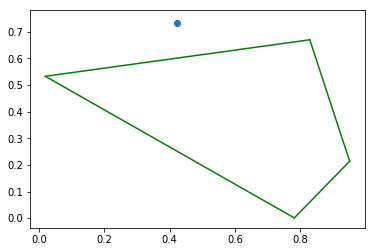

In [42]:
fig, ax = plt.subplots()
num_polygons = 1
num_dots = 1
num_sides = 6

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g')
x = np.random.rand(num_dots)
y = np.random.rand(num_dots)

ax.scatter(x,y)
plt.show()
